In [54]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
import re
import folium
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [55]:
# 한글 폰트 설정
# plt.rc('font', family='NanumSqaure')
# plt.rc('font', size=15)
# mpl.rcParams['axes.unicode_minus'] = False
# sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font) 

In [56]:
# merge한 데이터 불러오기
df = pd.read_csv('../data/지역별_연도별_비교데이터_합본.csv',encoding='utf-8',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1615 non-null   object 
 1   연도      1615 non-null   int64  
 2   월       1615 non-null   int64  
 3   평당분양가격  1600 non-null   float64
 4   인구수     1615 non-null   int64  
 5   경제활동인구  1615 non-null   int64  
 6   소득      1615 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 100.9+ KB


### Folium

In [57]:
# 2021년의 행정구역별 경제활동인구를 시각화하기 위해
# 2021년 데이터만 출력
df[df.연도 == 2021]

,행정구역,연도,월,평당분양가격,인구수,경제활동인구,소득
1428,서울특별시,2021,1,28267.8,9501528,5312000,390
1429,인천광역시,2021,1,15602.4,2940927,1629000,330
1430,경기도,2021,1,14414.4,13611628,7422000,361
1431,부산광역시,2021,1,14038.2,3327350,1715000,328
1432,대구광역시,2021,1,15354.9,2387631,1265000,309
...,...,...,...,...,...,...,...
1610,전라북도,2021,11,8976.0,1794192,974000,308
1611,전라남도,2021,11,9764.7,1782951,1008000,335
1612,경상북도,2021,11,10434.6,2640965,1457000,345
1613,경상남도,2021,11,10692.0,3317568,1805000,339


In [58]:
# 2021년 데이터를 데이터프레임으로 만들어 저장
df_2021 = pd.DataFrame(df[df.연도 == 2021])
df_2021

,행정구역,연도,월,평당분양가격,인구수,경제활동인구,소득
1428,서울특별시,2021,1,28267.8,9501528,5312000,390
1429,인천광역시,2021,1,15602.4,2940927,1629000,330
1430,경기도,2021,1,14414.4,13611628,7422000,361
1431,부산광역시,2021,1,14038.2,3327350,1715000,328
1432,대구광역시,2021,1,15354.9,2387631,1265000,309
...,...,...,...,...,...,...,...
1610,전라북도,2021,11,8976.0,1794192,974000,308
1611,전라남도,2021,11,9764.7,1782951,1008000,335
1612,경상북도,2021,11,10434.6,2640965,1457000,345
1613,경상남도,2021,11,10692.0,3317568,1805000,339


In [59]:
# 위치정보를 포함한 json 파일
rfile = open('../data/TL_SCCO_CTPRVN-checkpoint.json','r',encoding='utf8').read()
jsondata = json.loads(rfile)

In [60]:
# geojson 파일은 jsondata, 2021년 데이터를 가져와 행정구역 별 경제활동인구를 folium으로 지도 그리기
map = folium.Map(location=[35.54, 129.065],zoom_start=7,tiles='Stamen Watercolor')
folium.Choropleth(jsondata,
                  data=df_2021,
                  columns=['행정구역','경제활동인구'],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='BuPu').add_to(map)

map

In [61]:
# geojson 파일은 jsondata, 2021년 데이터를 가져와 행정구역 별 인구수를 folium으로 지도 그리기
map = folium.Map(location=[35.54, 129.065],zoom_start=7,tiles='Stamen Watercolor')
folium.Choropleth(jsondata,
                  data=df_2021,
                  columns=['행정구역','인구수'],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='BuPu').add_to(map)

map

In [62]:
# geojson 파일은 jsondata, 2021년 데이터를 가져와 행정구역 별 소득을 folium으로 지도 그리기
map = folium.Map(location=[35.54, 129.065],zoom_start=7,tiles='Stamen Watercolor')
folium.Choropleth(jsondata,
                  data=df_2021,
                  columns=['행정구역','소득'],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='BuPu').add_to(map)

map

In [63]:
# geojson 파일은 jsondata, 2021년 데이터를 가져와 행정구역 별 평당분양가격 folium으로 지도 그리기
map = folium.Map(location=[35.54, 129.065],zoom_start=7,tiles='Stamen Watercolor')
folium.Choropleth(jsondata,
                  data=df_2021,
                  columns=['행정구역','평당분양가격'],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='BuPu').add_to(map)

map

### 4개 데이터 시각화

- 데이터 전처리 (0 -> NaN)

In [64]:
df = df.replace(0, np.NaN)
df

,행정구역,연도,월,평당분양가격,인구수,경제활동인구,소득
0,서울특별시,2013,12,18189.0,9990010,5355000.0,316.0
1,부산광역시,2013,12,8111.0,3455734,1737000.0,252.0
2,대구광역시,2013,12,8080.0,2475657,1246000.0,231.0
3,인천광역시,2013,12,10204.0,2829608,1511000.0,260.0
4,광주광역시,2013,12,6098.0,1503835,727000.0,241.0
...,...,...,...,...,...,...,...
1610,전라북도,2021,11,8976.0,1794192,974000.0,308.0
1611,전라남도,2021,11,9764.7,1782951,1008000.0,335.0
1612,경상북도,2021,11,10434.6,2640965,1457000.0,345.0
1613,경상남도,2021,11,10692.0,3317568,1805000.0,339.0


- 산점도로 나타내기

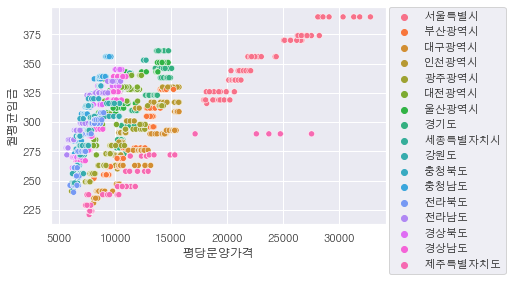

In [65]:
# 행정구역별 평당분양가격과 소득의 관계
# plt.figure(figsize=(8,8))
x = sns.scatterplot(data=df, y='소득', x='평당분양가격', hue='행정구역')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
x.set_ylabel('월평균임금')

plt.show()

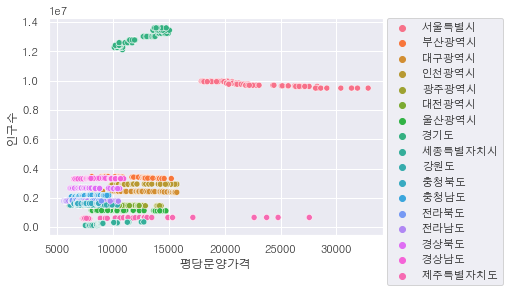

In [66]:
# 행정구역별 평당분양가격과 인구수의 관계
sns.scatterplot(data=df, y='인구수', x='평당분양가격', hue='행정구역')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

plt.show()

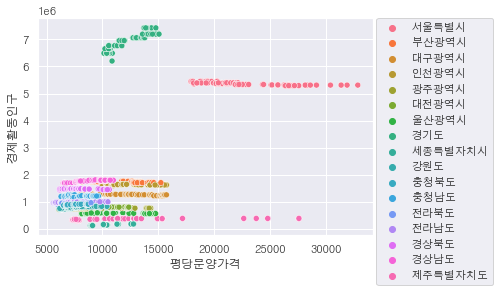

In [67]:
# 행정구역별 평당분양가격과 경제활동인구의 관계
sns.scatterplot(data=df, y='경제활동인구', x='평당분양가격', hue='행정구역')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

plt.show()

### 통계분석

#### 상관계수분석 (히트맵)

In [68]:
data = pd.read_csv('../data/지역별_연도별_비교데이터_합본.csv', encoding='utf-8', index_col=0)
data

,행정구역,연도,월,평당분양가격,인구수,경제활동인구,소득
0,서울특별시,2013,12,18189.0,9990010,5355000,316
1,부산광역시,2013,12,8111.0,3455734,1737000,252
2,대구광역시,2013,12,8080.0,2475657,1246000,231
3,인천광역시,2013,12,10204.0,2829608,1511000,260
4,광주광역시,2013,12,6098.0,1503835,727000,241
...,...,...,...,...,...,...,...
1610,전라북도,2021,11,8976.0,1794192,974000,308
1611,전라남도,2021,11,9764.7,1782951,1008000,335
1612,경상북도,2021,11,10434.6,2640965,1457000,345
1613,경상남도,2021,11,10692.0,3317568,1805000,339


In [69]:
data['연도'] = data['연도'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1615 non-null   object 
 1   연도      1615 non-null   object 
 2   월       1615 non-null   int64  
 3   평당분양가격  1600 non-null   float64
 4   인구수     1615 non-null   int64  
 5   경제활동인구  1615 non-null   int64  
 6   소득      1615 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 100.9+ KB


In [70]:
data_corr = data.corr(method='pearson')
data_corr

,월,평당분양가격,인구수,경제활동인구,소득
월,1.000000,0.029969,-0.000352,-0.001111,-0.018727
평당분양가격,0.029969,1.000000,0.537234,0.544592,0.303513
인구수,-0.000352,0.537234,1.000000,0.999519,0.332568
경제활동인구,-0.001111,0.544592,0.999519,1.000000,0.342404
소득,-0.018727,0.303513,0.332568,0.342404,1.000000


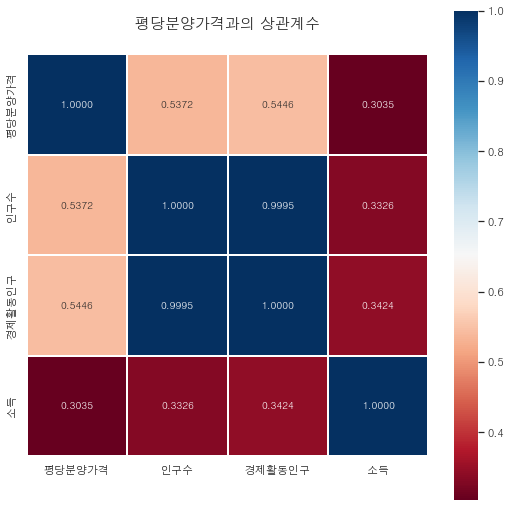

In [71]:
heatmap_data = data[['평당분양가격', '인구수', '경제활동인구', '소득']]
color_map = plt.cm.RdBu

plt.figure(figsize=(9, 9))
plt.title('평당분양가격과의 상관계수', y = 1.05, size = 15)
sns.heatmap(data=heatmap_data.corr(), linewidths=0.1, square=True, fmt='.4f', cmap=color_map, annot=True)
plt.show()

#### 선형회귀분석

In [72]:
# 필요한 패키지 import
from scipy import stats
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [73]:
Rformula = '평당분양가격 ~ 인구수 + 경제활동인구 + 소득'

In [74]:
regre_result = ols(Rformula, data=data).fit()
regre_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평당분양가격   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     287.7
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          2.90e-149
Time:                        14:58:16   Log-Likelihood:                -15285.
No. Observations:                1600   AIC:                         3.058e+04
Df Residuals:                    1596   BIC:                         3.060e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7771.2860    391.584     19.846      0.000    7003.212    8539.360
인구수           -0.0090      0.001     -9.886      0.000      -0.011      -0.007
경제활동인구         0.0178      0.002     10.604      0.000       0.015       0.021
소득             3.2642      1.385      2.356      0.019       0.547       5.981
==============================================================================
Omnibus:                      366.567   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.461
Skew:                           1.237   Prob(JB):                    1.18e-193
Kurtosis:                       5.684   Cond. No.                     2.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Partial Regression (그래프)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


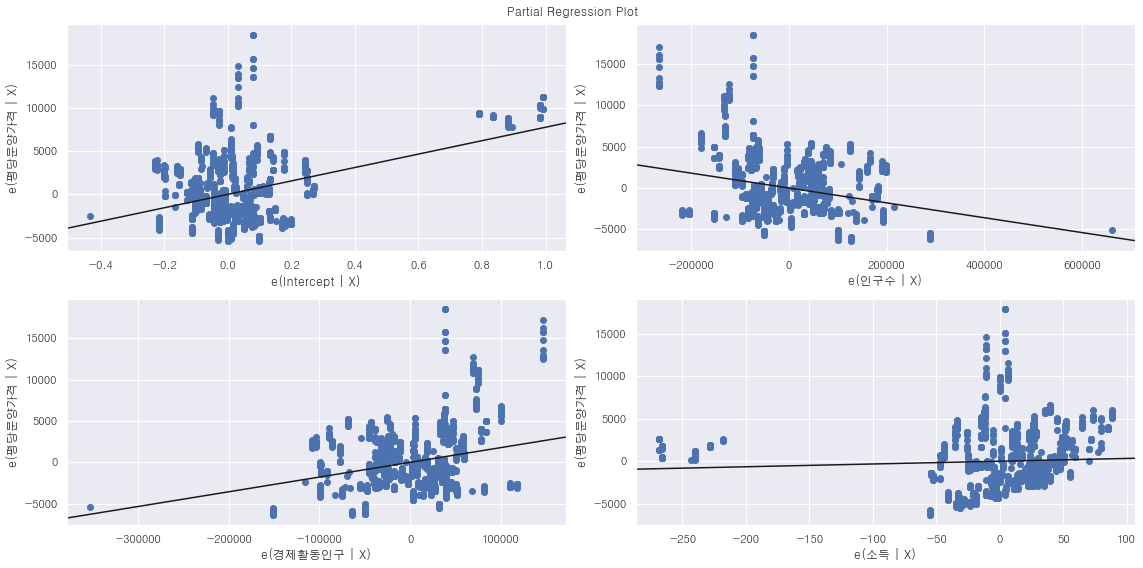

In [75]:
fig = plt.figure(figsize=(16, 8))
sm.graphics.plot_partregress_grid(regre_result, fig=fig)
plt.show()

#### 지역별 분포

- KDE

In [76]:
data

,행정구역,연도,월,평당분양가격,인구수,경제활동인구,소득
0,서울특별시,2013,12,18189.0,9990010,5355000,316
1,부산광역시,2013,12,8111.0,3455734,1737000,252
2,대구광역시,2013,12,8080.0,2475657,1246000,231
3,인천광역시,2013,12,10204.0,2829608,1511000,260
4,광주광역시,2013,12,6098.0,1503835,727000,241
...,...,...,...,...,...,...,...
1610,전라북도,2021,11,8976.0,1794192,974000,308
1611,전라남도,2021,11,9764.7,1782951,1008000,335
1612,경상북도,2021,11,10434.6,2640965,1457000,345
1613,경상남도,2021,11,10692.0,3317568,1805000,339


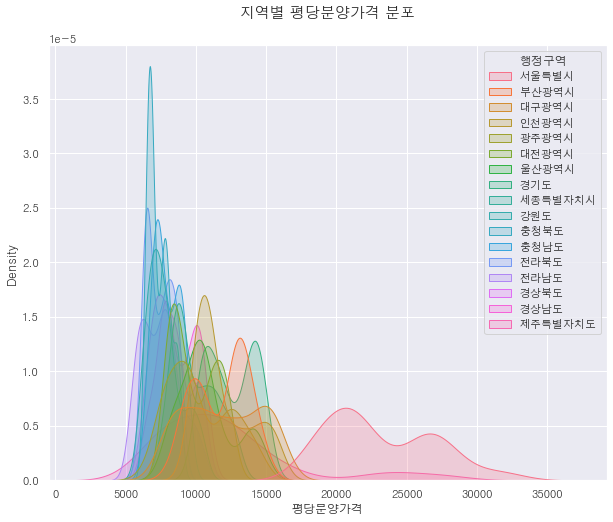

In [77]:
plt.figure(figsize=(10, 8))
plt.title('지역별 평당분양가격 분포', y = 1.05, size = 15)
sns.kdeplot(data=data, x='평당분양가격', hue='행정구역', shade=any)
plt.show()